In [87]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('orders_products_details/orders_products_details.csv')
df.head(3)

order_id  customer_id  order_status  order_date required_date shipped_date  \
0         1          259             4  2016-01-01    2016-01-03   2016-01-03   
1         2         1212             4  2016-01-01    2016-01-04   2016-01-03   
2         3          523             4  2016-01-02    2016-01-05   2016-01-03   

   store_id  staff_id           extraction_time_x    source  ...  \
0         1         2  2024-04-29 12:47:30.938683  postgres  ...   
1         2         6  2024-04-29 12:47:30.938683  postgres  ...   
2         2         7  2024-04-29 12:47:30.938683  postgres  ...   

            extraction_time_y  source_y  list_price_egp  \
0  2024-04-29 10:28:00.188186       api       28590.557   
1  2024-04-29 10:28:00.188186       api       28590.557   
2  2024-04-29 10:28:00.188186       api       28590.557   

                                     product_name  brand_id  category_id  \
0  Electra Townie Original 7D EQ - Women's - 2016         1            3   
1  Electra Townie Original 7D EQ - Women's - 2016         1            3   
2  Electra Townie Original 7D EQ - Women's - 2016         1            3   

   model_year  list_price_y         extraction_time_y.1  \
0        2016        599.99  2024-04-29 12:14:14.277891   
1        2016        599.99  2024-04-29 12:14:14.277891   
2        2016        599.99  2024-04-29 12:14:14.277891   

                     source_folder  
0  datalake/bikestore_dim/products  
1  datalake/bikestore_dim/products  
2  datalake/bikestore_dim/products  

[3 rows x 32 columns]

Text(0.5, 1.0, 'Top 10 Selling Product')

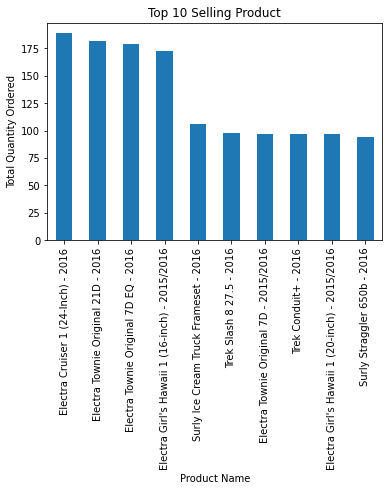

<Figure size 864x576 with 0 Axes>

In [86]:
#Top 10 Selling Product
ax = df['product_name'].value_counts().head(10).plot.bar()
plt.figure(figsize=(12, 8))
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Quantity Ordered')
ax.set_title('Top 10 Selling Product')

<AxesSubplot:ylabel='Frequency'>

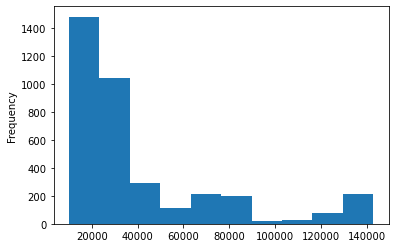

In [83]:
#distribution of sold product price

df[df['list_price_egp'] < 150000]['list_price_egp'].plot.hist()

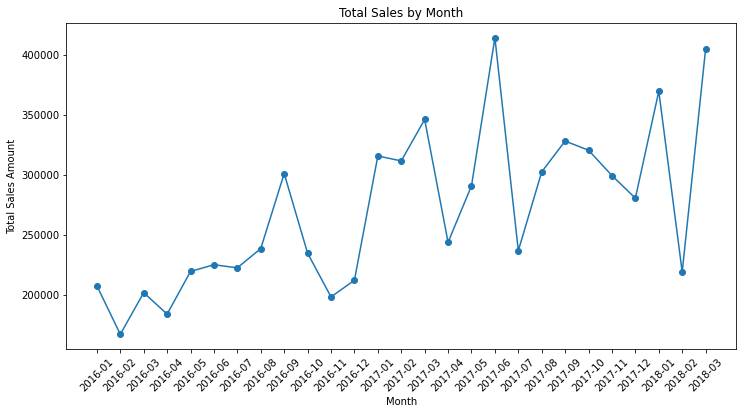

In [84]:
# Calculate total sales amount per order
df['order_date'] = pd.to_datetime(df['order_date'] ,format='%Y-%m-%d' )

df['total_sales'] = df['quantity'] * df['list_price_x']

# Extract month and year from order_date
df['order_month'] = df['order_date'].dt.to_period('M')

# Group by order_month and sum the total sales
monthly_sales = df.groupby('order_month')['total_sales'].sum().reset_index()

# Sort the data by order_month (optional, for better visualization)
monthly_sales = monthly_sales.sort_values(by='order_month')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_month'].astype(str), monthly_sales['total_sales'], marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()